<a href="https://colab.research.google.com/github/aaki2941/PortfolioWebsite/blob/master/Carbon_footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df = pd.read_csv("/content/productionGoodsImpact.csv")

In [4]:
df.head(10)

,production_id,branch_id,branch_name,production_type,good_used,quantity_used (tons),carbon_emission (tons CO2),water_usage (liters),waste_generated (tons)
0,1,1004,"Oneal, Rogers and Anthony",Automobile Parts,Timber,2944.14,6248.80,19790696.04,335.37
1,2,1005,Wright PLC,Furniture,Timber,2168.68,2057.79,16929505.90,786.12
2,3,1007,"Patterson, Cardenas and Nelson",Automobile Parts,Plastic,402.01,307.97,1709156.80,109.56
3,4,1005,Reynolds PLC,Electronics,Petroleum Products,3824.15,4427.14,29273652.13,1866.13
4,5,1004,Weber-Thomas,Furniture,Cotton,618.57,1232.38,5542841.01,189.42
5,6,1009,Perez-Bell,Electronics,Aluminum,4405.96,7605.80,43029649.20,671.45
6,7,1002,"Chang, Doyle and Mayer",Furniture,Petroleum Products,1334.26,2164.10,5174899.83,526.35
7,8,1006,Russo-Cook,Pharmaceuticals,Aluminum,4501.44,5070.85,6769149.81,1232.29
8,9,1002,"Massey, Franklin and Ramirez",Chemicals,Cotton,1852.95,2998.56,9796863.47,368.85
9,10,1005,Henderson-Hall,Electronics,Glass,3634.23,2375.54,35467042.42,805.78


In [5]:
#Data Preprocessing
#One Hot encoding on production_type and good_used

df_encoding = pd.get_dummies(df, columns = ['production_type','good_used'])

In [6]:
df_encoding.head(5)

,production_id,branch_id,branch_name,quantity_used (tons),carbon_emission (tons CO2),water_usage (liters),waste_generated (tons),production_type_Automobile Parts,production_type_Chemicals,production_type_Electronics,...,production_type_Pharmaceuticals,production_type_Textile,good_used_Aluminum,good_used_Cotton,good_used_Glass,good_used_Petroleum Products,good_used_Plastic,good_used_Steel,good_used_Timber,good_used_Wheat
0,1,1004,"Oneal, Rogers and Anthony",2944.14,6248.80,19790696.04,335.37,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,1005,Wright PLC,2168.68,2057.79,16929505.90,786.12,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,1007,"Patterson, Cardenas and Nelson",402.01,307.97,1709156.80,109.56,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,4,1005,Reynolds PLC,3824.15,4427.14,29273652.13,1866.13,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,5,1004,Weber-Thomas,618.57,1232.38,5542841.01,189.42,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [7]:
#scaler1 = StandardScaler()

#normalization_features = ['carbon_emission (tons CO2)', 'water_usage (liters)','waste_generated (tons)']


#df[normalization_features] = scaler1.fit_transform(df[normalization_features])

#print(df.head())

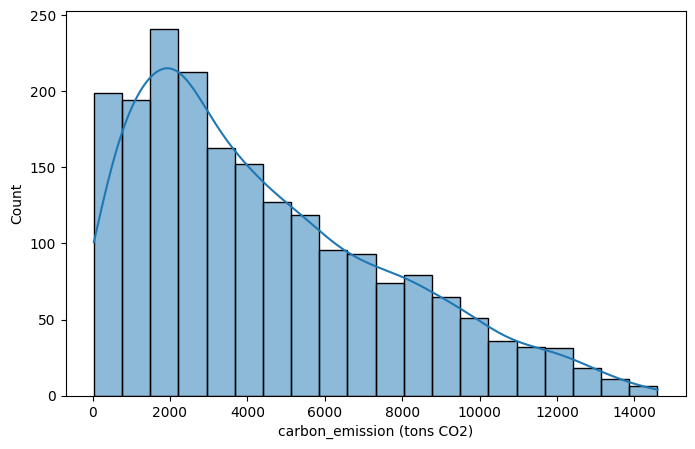

In [8]:

#Visualise carbon footprint distribution
plt.figure(figsize=(8,5))
sns.histplot(df_encoding['carbon_emission (tons CO2)'], bins='auto', kde=True)
plt.show()

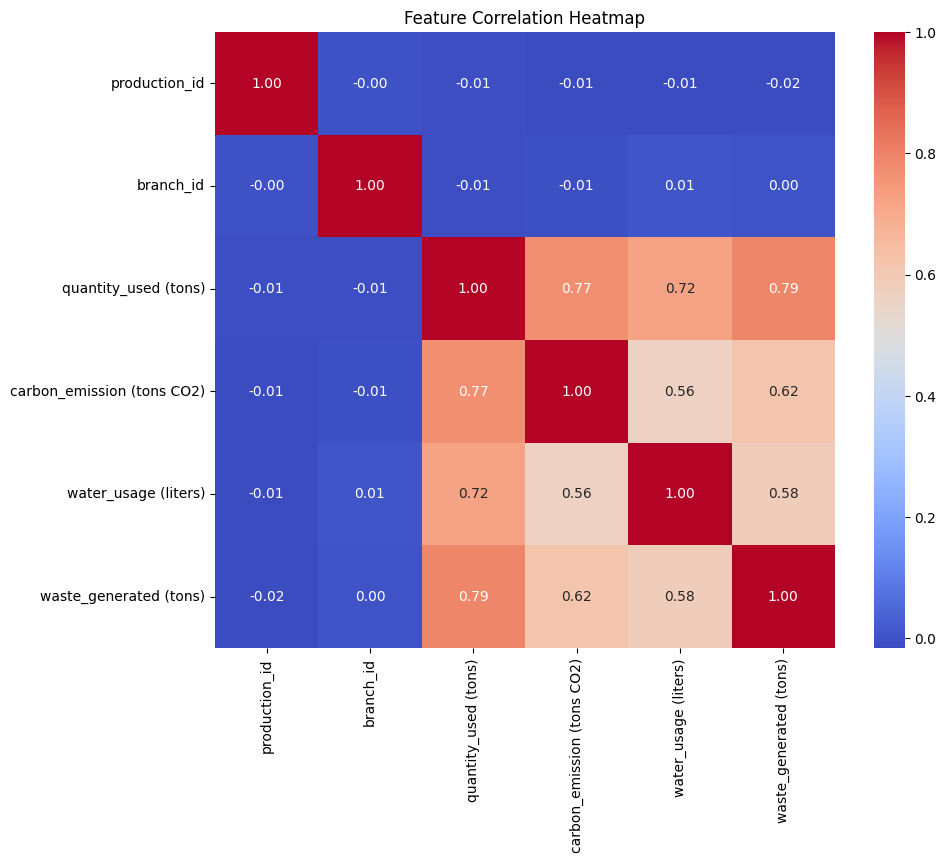

In [9]:
#Data Correlation

#Selecting only numerical columns
numerical_cols = df_encoding.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,8))
sns.heatmap(numerical_cols.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-10-b7790b288234>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='production_type',y='carbon_emission (tons CO2)',data = df, ci= None)


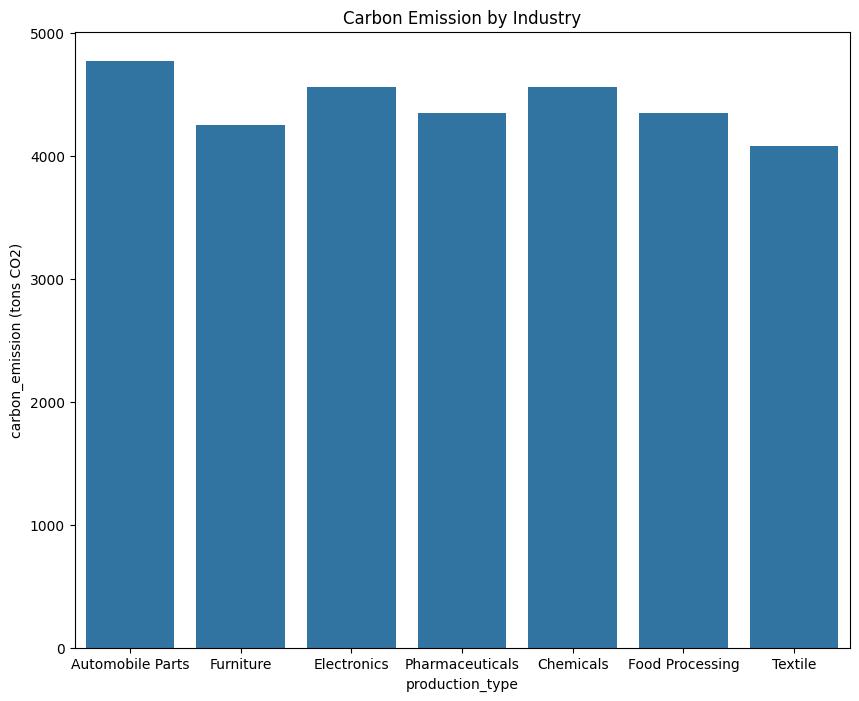

In [10]:
#Analysing carbon emission according to industries
plt.figure(figsize=(10,8))
sns.barplot(x='production_type',y='carbon_emission (tons CO2)',data = df, ci= None)
plt.title("Carbon Emission by Industry")
plt.show()

<ipython-input-11-f641c6f52318>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'good_used', y='carbon_emission (tons CO2)', data=df, ci= None)


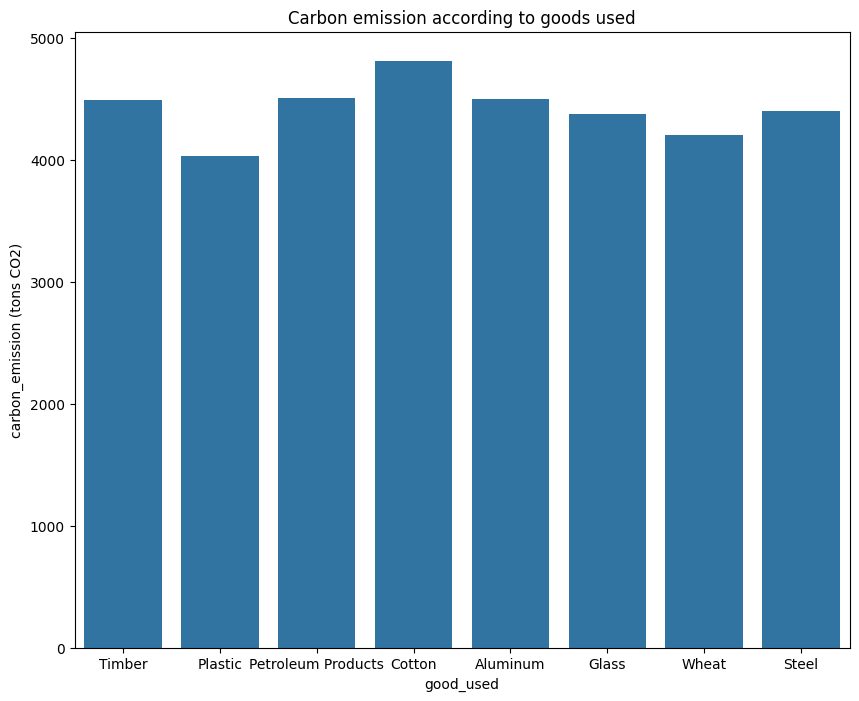

In [11]:
#Analysing carbon emission according to goods used
plt.figure(figsize=(10,8))
sns.barplot(x = 'good_used', y='carbon_emission (tons CO2)', data=df, ci= None)
plt.title('Carbon emission according to goods used')
plt.show()

In [12]:
#Assigning Emission Factors to the goods used
emission_factors = {
    'Timber': 0.2,               # Timber has low emissions due to carbon sequestration
    'Plastic': 6.0,              # High due to fossil-fuel base
    'Petroleum Products': 10.0,  # Very high, especially fuel-based
    'Cotton': 2.4,               # Includes farming, water use, processing
    'Aluminium': 11.0,           # Extremely energy-intensive to produce
    'Glass': 1.5,                # Medium impact, depends on source
    'Wheat': 1.3,                # Includes fertilizer, transport, etc.
    'Steel': 2.8                 # Moderate to high, energy-intensive
}

water_emission = 0.0003
waste_emission = 0.5

In [13]:
#Measuring carbon footprint according to goods used, amount of goods used, water consumption and waste generated
df['material_emission'] = df['good_used'].map(emission_factors).fillna(0)

#calculate emission for goods, water and waste
df['goods_emission'] = df['quantity_used (tons)']* df['material_emission']
df['water_ce'] = df['water_usage (liters)'] * water_emission
df['waste_ce'] = df['waste_generated (tons)'] * waste_emission

#Total Carbon footprint
df['Carbon_Footprint'] = (df['goods_emission'] +
                          df['water_ce']+
                          df['waste_ce'])

In [14]:
df.head()

,production_id,branch_id,branch_name,production_type,good_used,quantity_used (tons),carbon_emission (tons CO2),water_usage (liters),waste_generated (tons),material_emission,goods_emission,water_ce,waste_ce,Carbon_Footprint
0,1,1004,"Oneal, Rogers and Anthony",Automobile Parts,Timber,2944.14,6248.80,19790696.04,335.37,0.2,588.828,5937.208812,167.685,6693.721812
1,2,1005,Wright PLC,Furniture,Timber,2168.68,2057.79,16929505.90,786.12,0.2,433.736,5078.851770,393.060,5905.647770
2,3,1007,"Patterson, Cardenas and Nelson",Automobile Parts,Plastic,402.01,307.97,1709156.80,109.56,6.0,2412.060,512.747040,54.780,2979.587040
3,4,1005,Reynolds PLC,Electronics,Petroleum Products,3824.15,4427.14,29273652.13,1866.13,10.0,38241.500,8782.095639,933.065,47956.660639
4,5,1004,Weber-Thomas,Furniture,Cotton,618.57,1232.38,5542841.01,189.42,2.4,1484.568,1662.852303,94.710,3242.130303


In [15]:
#Define Threshold


Highest_footprint = df['Carbon_Footprint'].max()
print(Highest_footprint, ' is the highest carbon footprint')

Lowest_footprint = df['Carbon_Footprint'].min()
print(Lowest_footprint,' is the lowest carbon footprint')

def classify_footprint(x):
  if x < 9000:
    return "Low"

  else:
    return "High"


df['emission_level'] = df['Carbon_Footprint'].apply(classify_footprint)

64858.405339  is the highest carbon footprint
51.950569  is the lowest carbon footprint


In [16]:
df.head()

,production_id,branch_id,branch_name,production_type,good_used,quantity_used (tons),carbon_emission (tons CO2),water_usage (liters),waste_generated (tons),material_emission,goods_emission,water_ce,waste_ce,Carbon_Footprint,emission_level
0,1,1004,"Oneal, Rogers and Anthony",Automobile Parts,Timber,2944.14,6248.80,19790696.04,335.37,0.2,588.828,5937.208812,167.685,6693.721812,Low
1,2,1005,Wright PLC,Furniture,Timber,2168.68,2057.79,16929505.90,786.12,0.2,433.736,5078.851770,393.060,5905.647770,Low
2,3,1007,"Patterson, Cardenas and Nelson",Automobile Parts,Plastic,402.01,307.97,1709156.80,109.56,6.0,2412.060,512.747040,54.780,2979.587040,Low
3,4,1005,Reynolds PLC,Electronics,Petroleum Products,3824.15,4427.14,29273652.13,1866.13,10.0,38241.500,8782.095639,933.065,47956.660639,High
4,5,1004,Weber-Thomas,Furniture,Cotton,618.57,1232.38,5542841.01,189.42,2.4,1484.568,1662.852303,94.710,3242.130303,Low


<Axes: xlabel='emission_level', ylabel='count'>

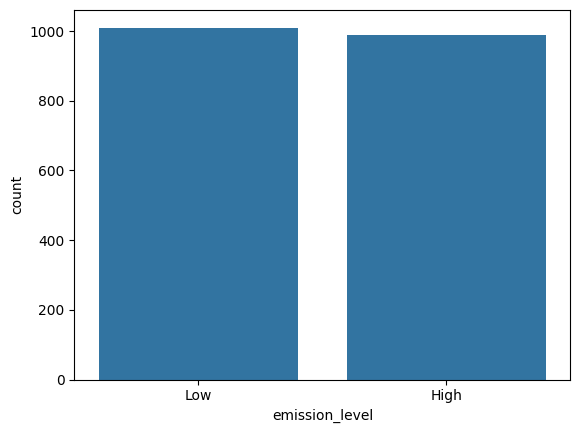

In [17]:
sns.countplot(data=df,x='emission_level')

In [18]:
#Train a linear model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#One hot encode the "good_used"

df_encoded = pd.get_dummies(df, columns=['good_used'], drop_first=True)
df_encoded.head()


,production_id,branch_id,branch_name,production_type,quantity_used (tons),carbon_emission (tons CO2),water_usage (liters),waste_generated (tons),material_emission,goods_emission,...,waste_ce,Carbon_Footprint,emission_level,good_used_Cotton,good_used_Glass,good_used_Petroleum Products,good_used_Plastic,good_used_Steel,good_used_Timber,good_used_Wheat
0,1,1004,"Oneal, Rogers and Anthony",Automobile Parts,2944.14,6248.80,19790696.04,335.37,0.2,588.828,...,167.685,6693.721812,Low,False,False,False,False,False,True,False
1,2,1005,Wright PLC,Furniture,2168.68,2057.79,16929505.90,786.12,0.2,433.736,...,393.060,5905.647770,Low,False,False,False,False,False,True,False
2,3,1007,"Patterson, Cardenas and Nelson",Automobile Parts,402.01,307.97,1709156.80,109.56,6.0,2412.060,...,54.780,2979.587040,Low,False,False,False,True,False,False,False
3,4,1005,Reynolds PLC,Electronics,3824.15,4427.14,29273652.13,1866.13,10.0,38241.500,...,933.065,47956.660639,High,False,False,True,False,False,False,False
4,5,1004,Weber-Thomas,Furniture,618.57,1232.38,5542841.01,189.42,2.4,1484.568,...,94.710,3242.130303,Low,True,False,False,False,False,False,False


In [24]:
#detecting outliers
Q1 = df_encoded['Carbon_Footprint'].quantile(0.25)
Q3 = df_encoded['Carbon_Footprint'].quantile(0.75)

IQR = Q3 - Q1

#define outliers
Lower_QR = Q1 - 1.5 * IQR
Upper_QR = Q3 + 1.5 * IQR

outliers = df_encoded[(df_encoded['Carbon_Footprint'] < Lower_QR) | (df_encoded['Carbon_Footprint'] > Upper_QR )]

print(f"Outliers detected: {len(outliers)}")

#clean outliers
df_cleaned = df_encoded[(df_encoded['Carbon_Footprint'] >= Lower_QR) & (df_encoded["Carbon_Footprint"] <= Upper_QR)]

Outliers detected: 133


In [42]:
x  = df_cleaned[['quantity_used (tons)',	'carbon_emission (tons CO2)',	'water_usage (liters)',	'waste_generated (tons)','good_used_Cotton',	'good_used_Glass',	'good_used_Petroleum Products',	'good_used_Plastic',	'good_used_Steel',	'good_used_Timber',	'good_used_Wheat']]
y = df_cleaned['Carbon_Footprint']

#Divide data into training and test
#Training with Linear Regression
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = LinearRegression()

model.fit(x_train,y_train)

future_emission = model.predict(x_test)
r2_LR = r2_score(y_test, future_emission)

#Evaluate model
accuracy = mean_squared_error(y_test, future_emission)
print(f"MSE: {accuracy:.2f}")
print("R2 score: ", r2_LR)



MSE: 9063234.34
R2 score:  0.8553686606186927


In [40]:
#Training with Random Forest

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

model1 = RandomForestRegressor(n_estimators=100, random_state=42)

model1.fit(x_train, y_train)

rf_predictions = model1.predict(x_test)

#Evaluate the model
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)


print ( "MSE: ", mse)
print ("R2 Score: ", r2)

#Initial MSE before outliers: 441216.4798595871

MSE:  334162.98827054247
R2 Score:  0.9949270421645852


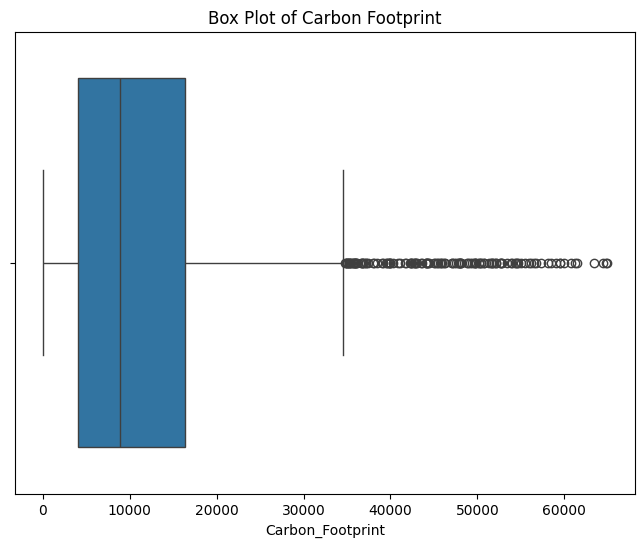

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Carbon Footprint
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Carbon_Footprint'])
plt.title('Box Plot of Carbon Footprint')
plt.show()

In [38]:
#Lets try with gradient boosting
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.02, max_depth=3, random_state=42)

model_gb.fit(x_train,y_train)

model_gb_preds = model_gb.predict(x_test)

mse_gb = mean_squared_error( y_test , model_gb_preds)
r2_gb = r2_score(y_test, model_gb_preds)

print ("MSE for GB: ", mse)
print("R2 score for GB: ", r2_gb)

MSE for GB:  327423.20126669575
R2 score for GB:  0.8377103333870946


In [ ]:
#Implementing feedback loop on Random Forest
R2_threshold = 0.9

if r2 < R2_threshold:
